## Teleportation

The idea of Teleportation is: There are 2 parties, Alice and Bob. Alice wants to send a quantum state to Bob, by not sending a qubit to Bob.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import XGate, ZGate
import numpy as np

We are creating 3 qubits. The Alice qubit, the Bob qubit and a shared qubit that will be sent from Bob to Alice. 

In [3]:
alice = QuantumRegister(1, "alice")
shared = QuantumRegister(1, "shared")
bob = QuantumRegister(1, "bob")

We generate a non-trivial quantum state on the Alice qubit (qubit 0) by rotating it by pi/3 around the x-axis.
The goal is to send this state to Bob.

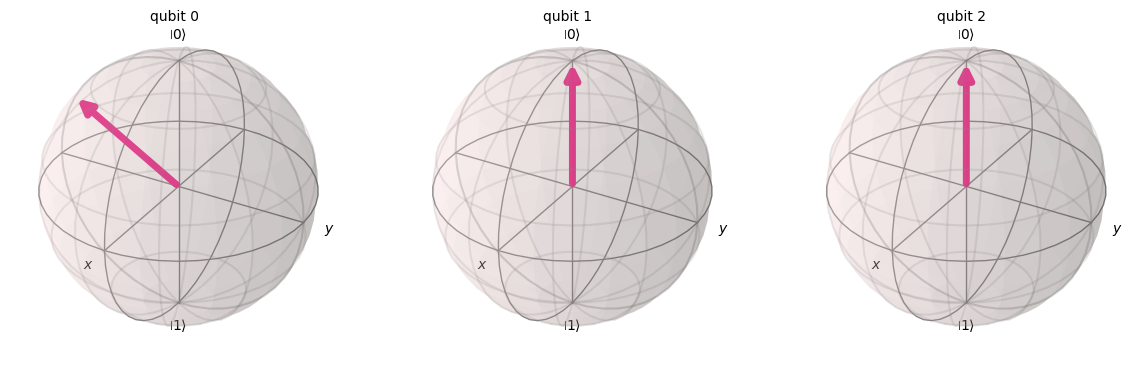

In [25]:
qc = QuantumCircuit(alice,shared,bob)
qc.rx(np.pi/3, alice[0])

statevector = Statevector(qc)

statevector.draw("bloch")

Bob entangles its qubit with the shared qubit (Bell pair) and sends the shared qubit to Alice.

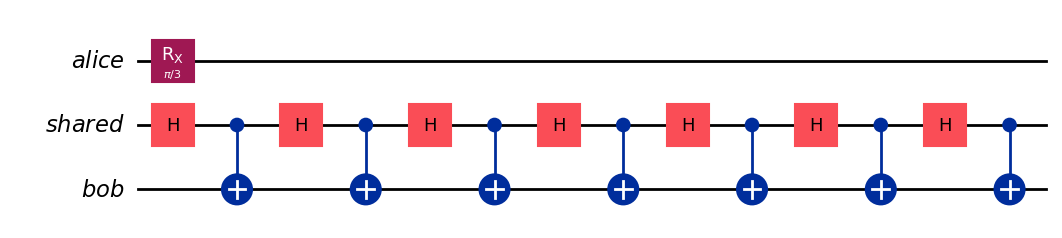

In [32]:
qc.h(shared[0])
qc.cx(shared[0], bob[0])

qc.draw(output='mpl')


Alice now entangles her qubit with the qubit she got from Bob and applies a Hadamard gate.

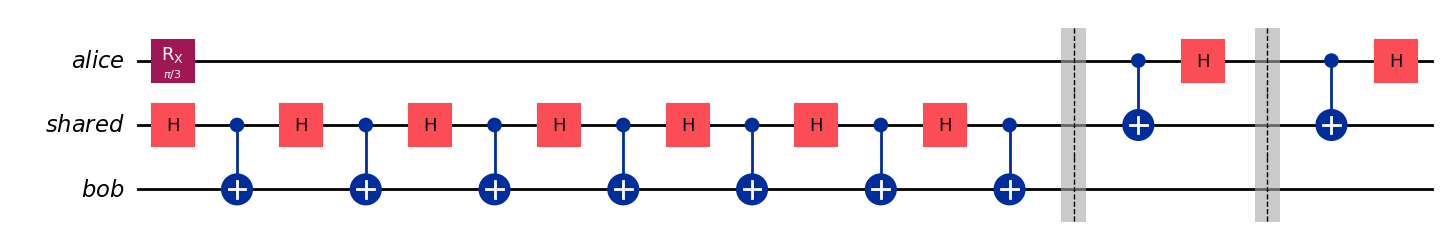

In [34]:
qc.barrier()

qc.cx(alice[0], shared[0])
qc.h(alice[0])

qc.draw(output='mpl')

This creates an entangled system, where a bloch sphere representation doesn't make sense because it can't visualize entanglement.

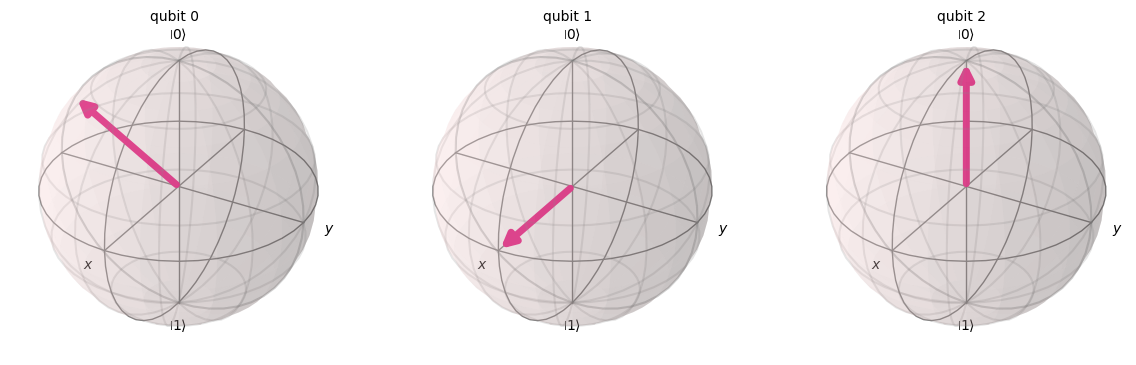

In [35]:
state = Statevector(qc)
plot_bloch_multivector(state)

Alice destroys the entanglement by measuring the shared qubit and her qubit.
Now displaying the bloch spheres makes sense again.

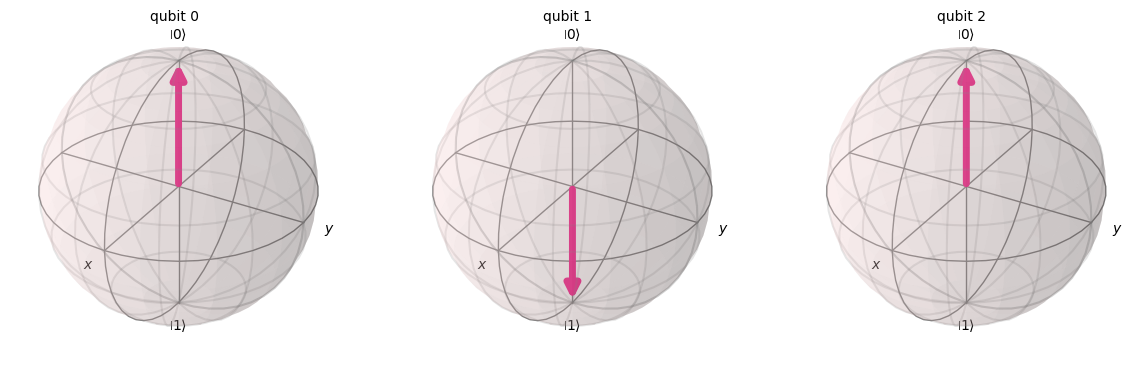

In [36]:
res,st = state.measure([0,1])
plot_bloch_multivector(st)

Alice now tells Bob the measurment outcome using a classical channel(e.g. internet, phone, mail pigeon, cursus publicus, ...).

If the shared qubit was measured 1 Bob needs to apply a X-Gate on its Qubit.

apply x


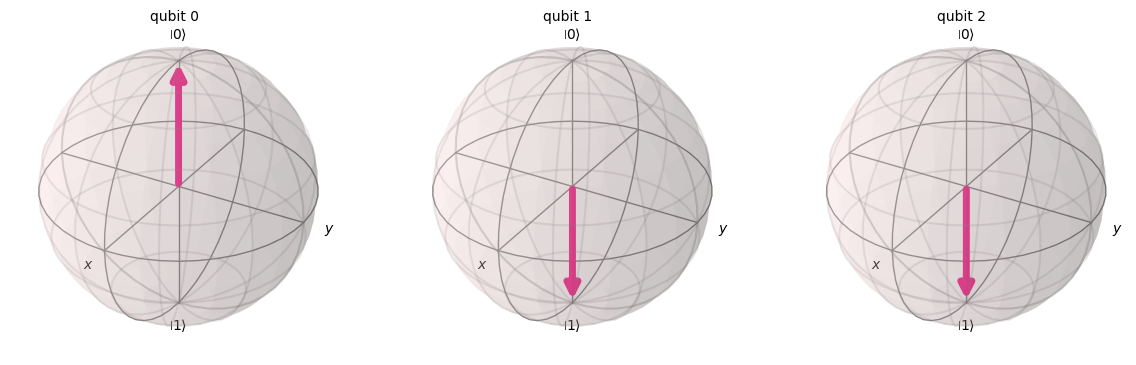

In [37]:
if res[0]=='1':
  print('apply x')
  st = st.evolve(XGate(),[2])
plot_bloch_multivector(st)

If the Alice qubit was measured 1 Bob needs to apply a Z-Gate on its Qubit.

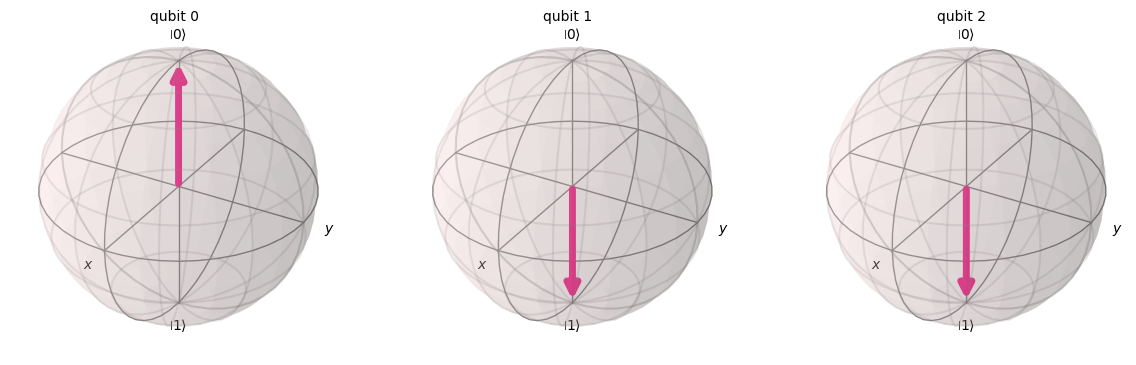

In [38]:
if res[1]=='1':
  print('apply z')
  st = st.evolve(ZGate(),[2])
plot_bloch_multivector(st)

The Bob qubit is now in the non-trivial initial state, but the state of the Alice qubit is destroyed.

Remember: the non-trivial initial was a pi/3 rotation around the x-axis. 

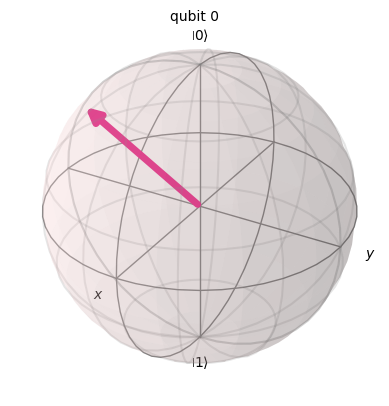

In [22]:
qc = QuantumCircuit(alice)
qc.rx(np.pi/3, alice[0])
plot_bloch_multivector(Statevector(qc))